In [263]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np  
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from arch import arch_model
from pmdarima import auto_arima


In [264]:
df = pd.read_csv("/Users/artiomlucunas/Desktop/Master thesis research/Research/project_data_combined.csv")
df.index = df.index+1
display(df.head(10))

,Date,Covid cases,Oil,Bitcoin,S&P500,Gold
1,11/8/16,0,44.98,709.85,2139.56,1273.4
2,11/9/16,0,45.27,723.27,2163.26,1272.6
3,11/10/16,0,44.66,715.53,2167.48,1265.5
4,11/11/16,0,NaN,716.41,2164.45,NaN
5,11/12/16,0,NaN,705.05,2164.45,NaN
6,11/13/16,0,NaN,702.03,2164.45,NaN
7,11/14/16,0,43.32,705.02,2164.20,1221.2
8,11/15/16,0,45.81,711.62,2180.39,1224.0
9,11/16/16,0,45.57,744.20,2176.94,1223.4
10,11/17/16,0,45.42,740.98,2187.12,1216.5


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 1 to 2920
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2920 non-null   object 
 1   Covid cases  2920 non-null   int64  
 2   Oil          2010 non-null   float64
 3   Bitcoin      2920 non-null   float64
 4   S&P500       2021 non-null   float64
 5   Gold         2009 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 137.0+ KB


In [266]:
df = df.fillna(method='ffill')
df['Date'] = pd.to_datetime(df['Date']).dt.date
display(df.head(10))

/var/folders/_3/s7llbsm90b512ln901_zmy9w0000gn/T/ipykernel_7481/3655705865.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date']).dt.date


,Date,Covid cases,Oil,Bitcoin,S&P500,Gold
1,2016-11-08,0,44.98,709.85,2139.56,1273.4
2,2016-11-09,0,45.27,723.27,2163.26,1272.6
3,2016-11-10,0,44.66,715.53,2167.48,1265.5
4,2016-11-11,0,44.66,716.41,2164.45,1265.5
5,2016-11-12,0,44.66,705.05,2164.45,1265.5
6,2016-11-13,0,44.66,702.03,2164.45,1265.5
7,2016-11-14,0,43.32,705.02,2164.20,1221.2
8,2016-11-15,0,45.81,711.62,2180.39,1224.0
9,2016-11-16,0,45.57,744.20,2176.94,1223.4
10,2016-11-17,0,45.42,740.98,2187.12,1216.5


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 1 to 2920
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2920 non-null   object 
 1   Covid cases  2920 non-null   int64  
 2   Oil          2920 non-null   float64
 3   Bitcoin      2920 non-null   float64
 4   S&P500       2920 non-null   float64
 5   Gold         2920 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 137.0+ KB


In [268]:
df.describe().round(2)

,Covid cases,Oil,Bitcoin,S&P500,Gold
count,2920.00,2920.00,2920.00,2920.00,2920.00
mean,154914.90,65.63,23295.20,3605.02,1675.09
std,402805.02,17.94,20219.07,942.60,359.36
min,0.00,-37.63,702.03,2139.56,1127.80
25%,0.00,52.95,7096.26,2772.12,1303.45
50%,0.00,65.74,16380.78,3530.44,1741.45
75%,6936.00,77.11,37805.36,4350.11,1907.62
max,4083281.00,123.70,73083.50,5864.67,2788.50


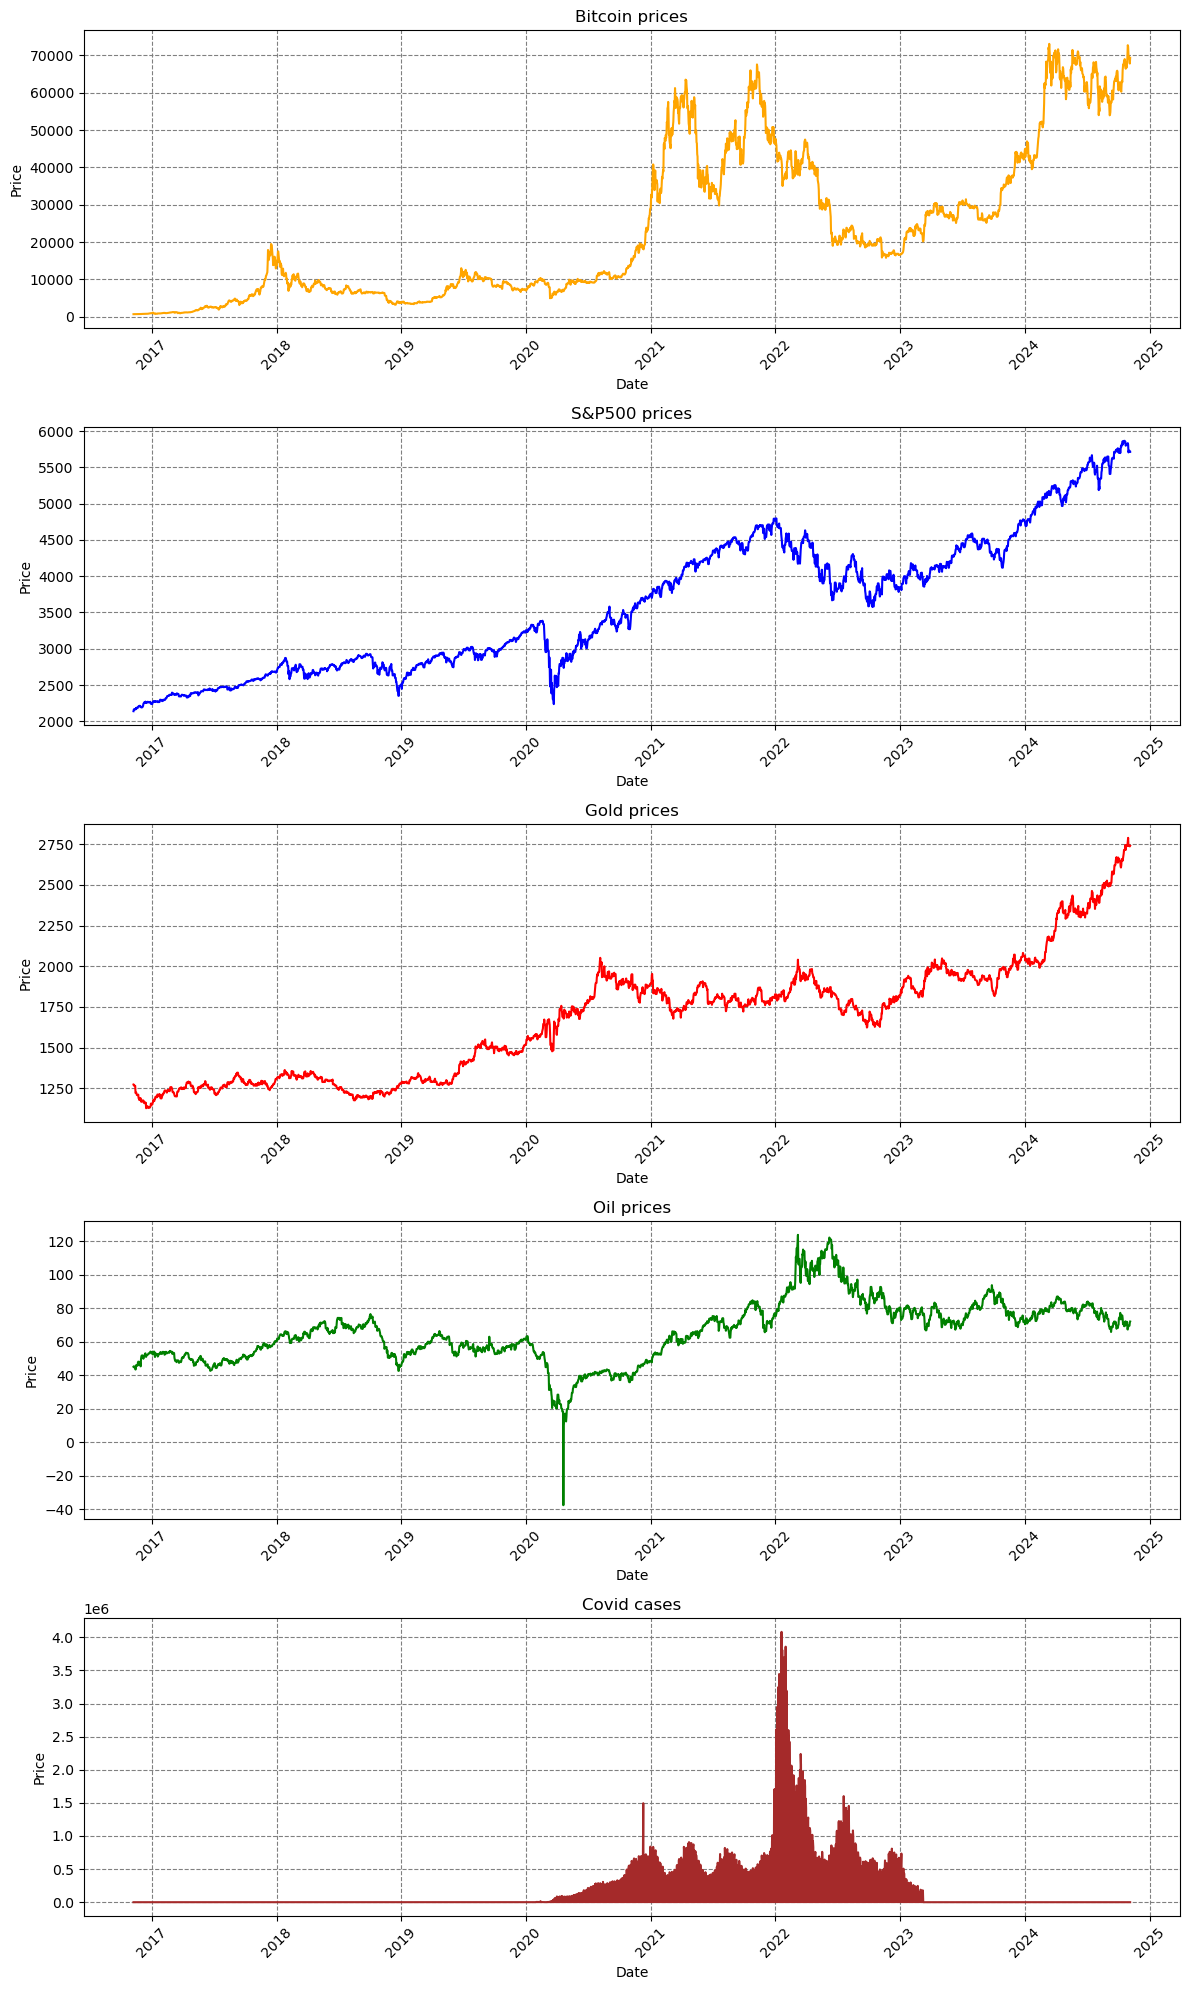

In [269]:
fig, axes = plt.subplots(5,1, figsize=(12,20))

axes[0].plot(df['Date'], df['Bitcoin'], color='orange')
axes[0].set_title('Bitcoin prices')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')
axes[0].xaxis.set_major_locator(mdates.YearLocator())
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, color='gray', linestyle='--', zorder=-1)

axes[1].plot(df['Date'], df['S&P500'], color='blue')
axes[1].set_title('S&P500 prices')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price')
axes[1].xaxis.set_major_locator(mdates.YearLocator())
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, color='gray', linestyle='--', zorder=-1)

axes[2].plot(df['Date'], df['Gold'], color='red')
axes[2].set_title('Gold prices')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Price')
axes[2].xaxis.set_major_locator(mdates.YearLocator())
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, color='gray', linestyle='--', zorder=-1)

axes[3].plot(df['Date'], df['Oil'], color='green')
axes[3].set_title('Oil prices')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Price')
axes[3].xaxis.set_major_locator(mdates.YearLocator())
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[3].tick_params(axis='x', rotation=45)
axes[3].grid(True, color='gray', linestyle='--', zorder=-1)

axes[4].plot(df['Date'], df['Covid cases'], color='brown')
axes[4].set_title('Covid cases')
axes[4].set_xlabel('Date')
axes[4].set_ylabel('Price')
axes[4].xaxis.set_major_locator(mdates.YearLocator())
axes[4].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[4].tick_params(axis='x', rotation=45)
axes[4].grid(True, color='gray', linestyle='--', zorder=-1)


plt.tight_layout()
plt.show()

In [271]:
df = pd.DataFrame(df)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
correlation_matrix = df.corr().round(2)
display(correlation_matrix)

,Covid cases,Oil,Bitcoin,S&P500,Gold
Covid cases,1.00,0.28,0.23,0.23,0.16
Oil,0.28,1.00,0.53,0.61,0.41
Bitcoin,0.23,0.53,1.00,0.92,0.83
S&P500,0.23,0.61,0.92,1.00,0.92
Gold,0.16,0.41,0.83,0.92,1.00


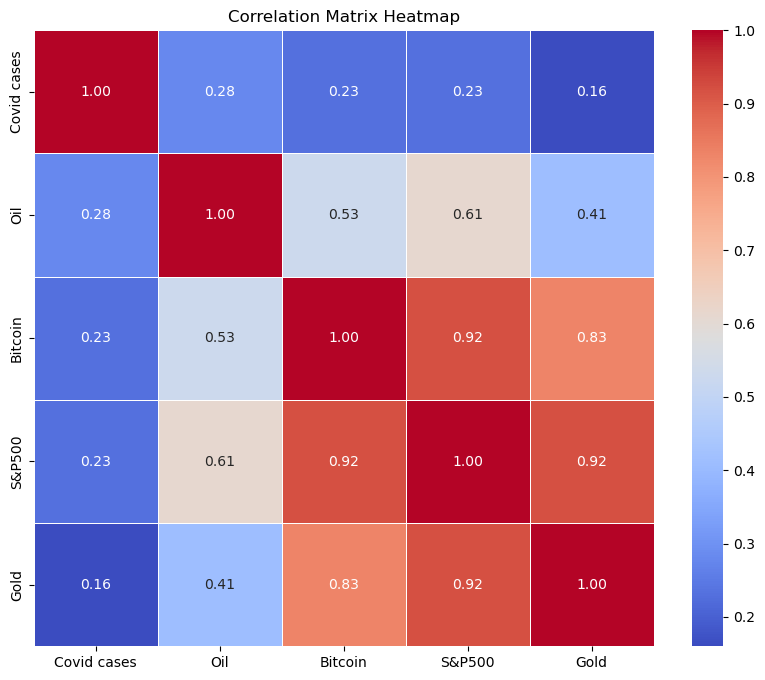

In [272]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

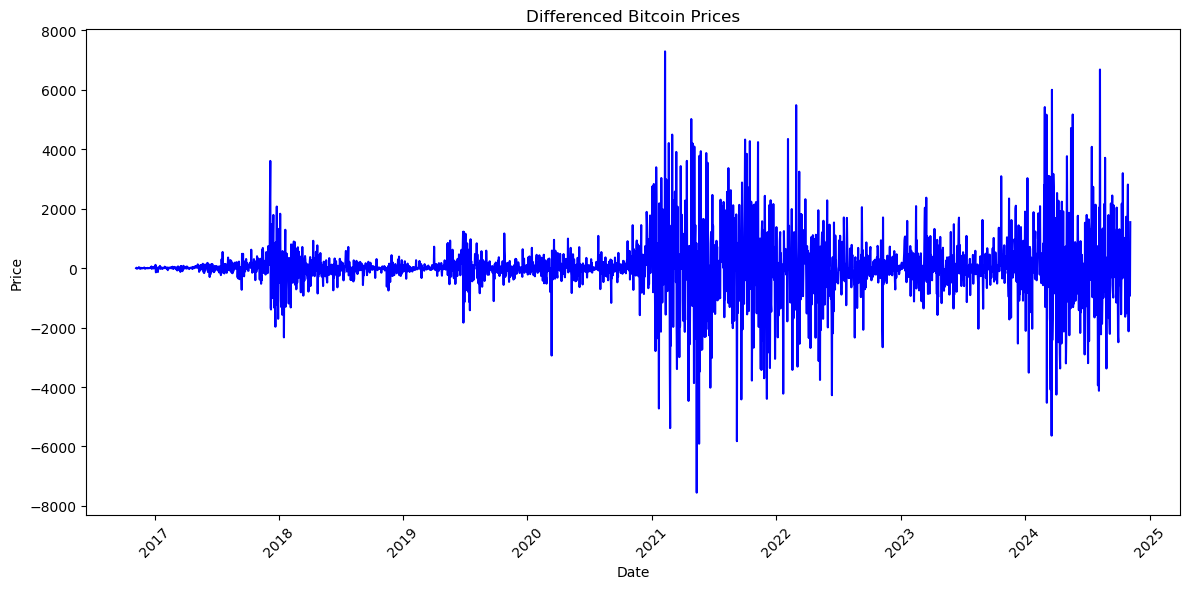

In [ ]:
bitcoin_sample = df[['Date', 'Bitcoin', 'Oil', 'Covid cases']]
bitcoin_sample.loc[:, 'Bitcoin'] = bitcoin_sample['Bitcoin'].diff()
bitcoin_sample = bitcoin_sample.fillna(1)

bitcoin_sample.loc[:, 'Date'] = pd.to_datetime(bitcoin_sample['Date'])


plt.figure(figsize=(12, 6))
plt.plot(bitcoin_sample['Date'], bitcoin_sample['Bitcoin'], color='blue')
plt.title('Differenced Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


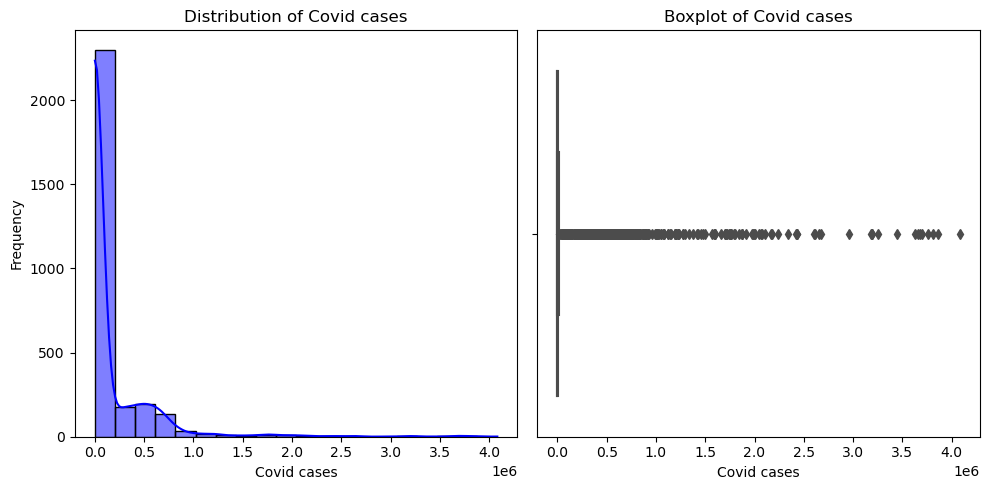

Lower Bound: -10404.0
Upper Bound: 17340.0
Number of Outliers: 725
count       2920.00
mean      154914.90
std       402805.02
min            0.00
25%            0.00
50%            0.00
75%         6936.00
max      4083281.00
Name: Covid cases, dtype: float64


In [ ]:
def analyze_feature(data, feature_name, feature_title):

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data[feature_name], kde=True, bins=20, color="blue")
    plt.title(f"Distribution of {feature_title}")
    plt.xlabel("Covid cases")
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[feature_name], color="red")
    plt.title(f"Boxplot of {feature_title}")
    plt.xlabel("Covid cases")

    plt.tight_layout()
    plt.show()

    q1 = data[feature_name].quantile(0.25)
    q3 = df[feature_name].quantile(0.75)
    iqr = q3-q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = data[(data[feature_name] < lower_bound) | (data[feature_name] > upper_bound)]

    print("Lower Bound:", lower_bound.round(2))
    print("Upper Bound:", upper_bound.round(2))
    print("Number of Outliers:", len(outliers))
    print(data[feature_name].describe().round(2)
    )

analyze_feature(bitcoin_sample, 'Covid cases', 'Covid cases')

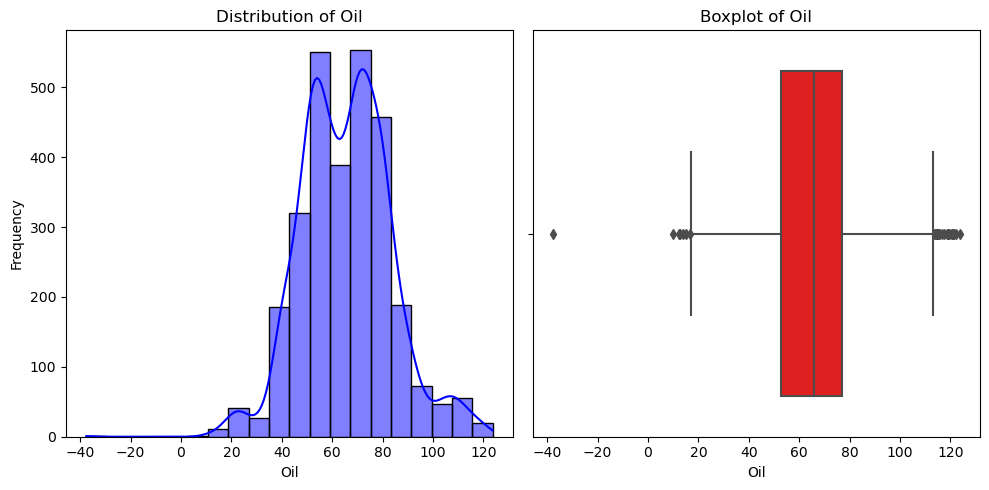

Lower Bound: 16.71
Upper Bound: 113.35
Number of Outliers: 39
count    2920.00
mean       65.63
std        17.94
min       -37.63
25%        52.95
50%        65.74
75%        77.11
max       123.70
Name: Oil, dtype: float64


In [ ]:
def analyze_feature(data, feature_name, feature_title):

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data[feature_name], kde=True, bins=20, color="blue")
    plt.title(f"Distribution of {feature_title}")
    plt.xlabel("Oil")
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[feature_name], color="red")
    plt.title(f"Boxplot of {feature_title}")
    plt.xlabel("Oil")

    plt.tight_layout()
    plt.show()

    q1 = data[feature_name].quantile(0.25)
    q3 = df[feature_name].quantile(0.75)
    iqr = q3-q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = data[(data[feature_name] < lower_bound) | (data[feature_name] > upper_bound)]

    print("Lower Bound:", lower_bound.round(2))
    print("Upper Bound:", upper_bound.round(2))
    print("Number of Outliers:", len(outliers))
    print(data[feature_name].describe().round(2)
    )

analyze_feature(bitcoin_sample, 'Oil', 'Oil')

In [ ]:
bitcoin_sample.head(5)

,Date,Bitcoin,Oil,Covid cases
1,2016-11-08 00:00:00,1.00,44.98,0
2,2016-11-09 00:00:00,13.42,45.27,0
3,2016-11-10 00:00:00,-7.74,44.66,0
4,2016-11-11 00:00:00,0.88,44.66,0
5,2016-11-12 00:00:00,-11.36,44.66,0


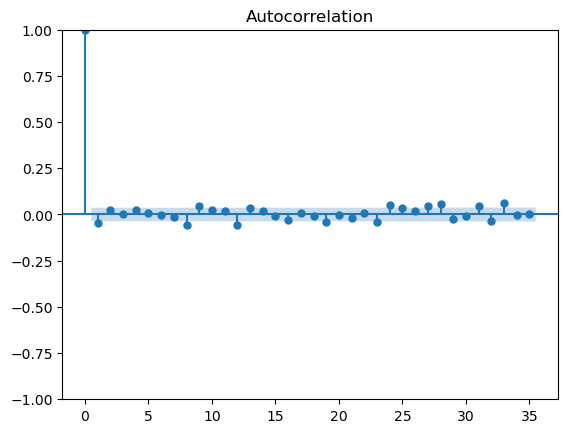

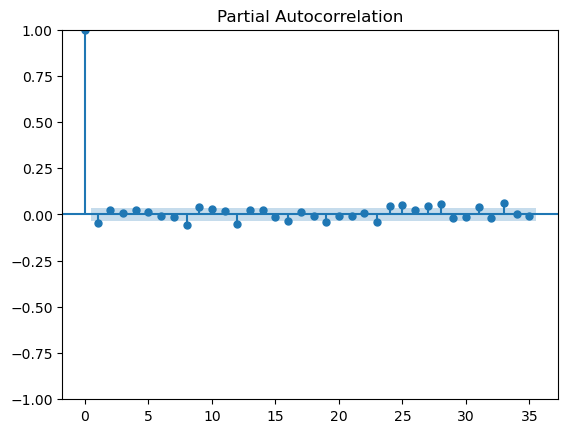

In [ ]:
bitcoin_acf = plot_acf(bitcoin_sample['Bitcoin'])
bitcoin_pacf = plot_pacf(bitcoin_sample['Bitcoin'])

In [ ]:
bitcoin_adfuller = adfuller(bitcoin_sample['Bitcoin'])
print("ADF Statistic: ", bitcoin_adfuller[0])
print("p-value: ", bitcoin_adfuller[1])
print("Critical Values: ", bitcoin_adfuller[4])

ADF Statistic:  -8.76886955611028
p-value:  2.5531193398148054e-14
Critical Values:  {'1%': -3.432613179040485, '5%': -2.8625399200643513, '10%': -2.567302286065055}


In [ ]:
pre_covid_end = pd.to_datetime("2020-03-10")
covid_start = pd.to_datetime("2020-03-11")
covid_end = pd.to_datetime("2022-02-23")
war_start = pd.to_datetime("2022-02-24")
full_end = pd.to_datetime("2024-11-05")

In [ ]:
bitcoin_sample = pd.DataFrame(bitcoin_sample)
bitcoin_sample['Date'] = pd.to_datetime(bitcoin_sample['Date'])
bitcoin_sample.set_index('Date', inplace=True)
bitcoin_sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2920 entries, 2016-11-08 to 2024-11-05
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bitcoin      2920 non-null   float64
 1   Oil          2920 non-null   float64
 2   Covid cases  2920 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 91.2 KB


In [ ]:
pre_covid_btc = bitcoin_sample.loc[:pre_covid_end]
covid_btc = bitcoin_sample.loc[covid_start:covid_end]
war_btc = bitcoin_sample.loc[war_start:]
full_btc = bitcoin_sample.loc[:full_end]

In [ ]:
X = full_btc.drop(columns=['Bitcoin'])
y = full_btc['Bitcoin']

In [ ]:
train_size = int(len(full_btc) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
model = ARIMA(y_train, order=(1,1,1), exog=X_train)

arimax_fit = model.fit()

print(arimax_fit.summary())

/Users/artiomlucunas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/artiomlucunas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/artiomlucunas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Bitcoin   No. Observations:                 2336
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -19371.932
Date:                Sun, 16 Feb 2025   AIC                          38753.864
Time:                        13:28:34   BIC                          38782.643
Sample:                    11-08-2016   HQIC                         38764.348
                         - 04-01-2023                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Oil             3.8579      8.107      0.476      0.634     -12.031      19.747
Covid cases    -0.0001   4.37e-05     -2.960      0.003      -0.000   -4.37e-05
ar.L1          -0.0169      0.016     -1.029    

In [ ]:
X = covid_btc.drop(columns=['Bitcoin'])
y = covid_btc['Bitcoin']

In [ ]:
train_size = int(len(covid_btc) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
model = ARIMA(y_train, order=(1,1,1), exog=X_train)

arimax_fit = model.fit()

print(arimax_fit.summary())

/Users/artiomlucunas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/artiomlucunas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/artiomlucunas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Bitcoin   No. Observations:                  572
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4946.584
Date:                Sun, 16 Feb 2025   AIC                           9903.169
Time:                        13:28:35   BIC                           9924.905
Sample:                    03-11-2020   HQIC                          9911.649
                         - 10-03-2021                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Oil            -2.5385      5.019     -0.506      0.613     -12.376       7.299
Covid cases  3.474e-05      0.000      0.143      0.887      -0.000       0.001
ar.L1          -0.0619      0.042     -1.462    